This case study is done using House_Pricing.csv data.

## Libraries

In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder


##**Dataset Overview**

* Load the dataset House_Pricing.csv

* Display basic information about the dataset using .info() and .describe() to understand the features, data types, and any initial insights into missing values.

In [27]:
df = pd.read_csv('House_Pricing.csv')
print(" Displaying basic information")
df.info()


 Displaying basic information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   objec

In [28]:
print(" Displaying statistically significant data of each column ")
df.describe()

 Displaying statistically significant data of each column 


,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [29]:
print("*******************************")
print(" Initial Insights")
print("*******************************")
print('\n')
print(" 1. There are null values present in the following columns : "'\n''\t'"['Sale Price', 'No of Bathrooms', ' Flat Area (in Sqft)', 'Lot Area (in Sqft)',"'\n''\t'" 'No of Times Visited', 'Area of the House from Basement (in Sqft)', 'Zipcode', "'\n''\t'"'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)'] ")
print(" 2. There are float values for columns : ['No of Bathrooms', 'No of Floors', 'Zipcode'] which are meant to be integer values. They need to be handled.")
print(" 3. THere are outliers in column 'No of Bedrooms', 'No of Bathrooms'")

*******************************
 Initial Insights
*******************************


 1. There are null values present in the following columns : 
	['Sale Price', 'No of Bathrooms', ' Flat Area (in Sqft)', 'Lot Area (in Sqft)',
	 'No of Times Visited', 'Area of the House from Basement (in Sqft)', 'Zipcode', 
	'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)'] 
 2. There are float values for columns : ['No of Bathrooms', 'No of Floors', 'Zipcode'] which are meant to be integer values. They need to be handled.
 3. THere are outliers in column 'No of Bedrooms', 'No of Bathrooms'


In [30]:
df.head(5)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


##**Duplicate Removal**
* Rows : Check for duplicate rows in the dataset, if any, and remove them.
* Columns : Identify and drop duplicate columns, if any, based on their values.

In [31]:
print(" number of duplicate entries = ",df.duplicated().sum()) # checking the existance of duplicate entries in the dataframe.
print(" since the number is 0, there is no need to remove any rows")
# since the number is 0, there is no need to remove any rows.

print(" Value in 'Flat Area (in Sqft)' is the sum of 'Area of the House from Basement (in Sqft)' and 'Basement Area (in Sqft)'")
print(" but, it is a good to have column. so, we are not dropping it.")

print('\n'"*******************************")
print(" ID value should be unique. hence, if there are duplicates of ID in the data, we will retain the latest data")
print(" Unique ID values = ", len(df['ID'].unique()))
print(" Total number of IDs = ", df['ID'].shape[0])
print(" This shows that we have duplicate values in ID column.")

# sorting the dataframe based on 'Date House was Sold' column in descending order
# ( because, we are trying to retain the latest info only).

df = df.sort_values('Date House was Sold')
df.drop_duplicates(subset='ID', keep="first")  # keeps the first data. since it is a sorted data, latest data remains.
print('\n'"*******************************")
print(" duplicate data in 'ID' column has been handled by retaining only the latest data.")


 number of duplicate entries =  0
 since the number is 0, there is no need to remove any rows
 Value in 'Flat Area (in Sqft)' is the sum of 'Area of the House from Basement (in Sqft)' and 'Basement Area (in Sqft)'
 but, it is a good to have column. so, we are not dropping it.

*******************************
 ID value should be unique. hence, if there are duplicates of ID in the data, we will retain the latest data
 Unique ID values =  21436
 Total number of IDs =  21613
 This shows that we have duplicate values in ID column.

*******************************
 duplicate data in 'ID' column has been handled by retaining only the latest data.


##**Handling Missing Values**
* Identify missing values in each column.
* Handle missing values:
  * For **numerical columns**, use imputation techniques like mean/median imputation.
  * For **categorical columns**, fill with mode.
* Document your approach for each feature with missing data.

In [32]:
df.isnull().sum() # Checking presence of null values in each column

,0
ID,0
Date House was Sold,0
Sale Price,4
No of Bedrooms,0
No of Bathrooms,4
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
No of Times Visited,19489


In [33]:
# Zipcode, Latitude, Longitude cannot be taken randomly. they are location specific values.
# since the number of missing information for each of them negligible, we will drop those rows.
df.dropna(subset=['Zipcode', 'Latitude', 'Longitude'], inplace=True)
# df.shape
num_cols = ['Sale Price','No of Bathrooms']  # accepting mean value as the value to be used for replacing missing values

for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())
    #df[col].fillna(df[col].mean()).inplace=True

num_cols = ['Flat Area (in Sqft)','Lot Area (in Sqft)', 'Living Area after Renovation (in Sqft)']
# accepting median value as the value to be used for replacing missing values.

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
    #df[col].fillna(df[col].median()).inplace=True

# 'Area of the House from Basement (in Sqft)' = 'Flat Area (in Sqft)' - 'Basement Area (in Sqft)'
df['Area of the House from Basement (in Sqft)'] = df['Flat Area (in Sqft)'] - df['Basement Area (in Sqft)']

# No of Times Visited is a categorical column. we could use mode value to replace the missing values.
# but, since there are so many missing values and replacing them would result in biased output,
# we will drop that column and not consider it for analysis.
df.drop('No of Times Visited', axis=1, inplace=True)

df.isnull().sum() # confirming that there are no missing value in the data.

,0
ID,0
Date House was Sold,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),0
Lot Area (in Sqft),0
No of Floors,0
Waterfront View,0
Condition of the House,0


##**Scaling Numerical Variables**
* Identify all **numerical columns** (excluding the target variable SalePrice).
* Scale these features using techniques like **Min-Max scaling** or **Standard scaling**.

In [34]:
num_df= df.select_dtypes(include="number")
# question demands to drop 'Sale Price'. and also, it is the target value
num_df.drop('Sale Price', axis=1, inplace=True)
num_df.head(5)



,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
11854,9412700160,3,2.25,1830.0,7770.0,1.0,7,1400.0,430,41,0,98042.0,47.3925,-122.161,1960.0,7272
15047,274000020,4,1.75,1940.0,7500.0,1.0,7,1720.0,220,52,0,98030.0,47.3736,-122.215,2000.0,9000
2468,8563080270,4,2.50,2320.0,14240.0,1.0,9,1620.0,700,44,0,98008.0,47.6269,-122.090,2810.0,13200
7983,2473372170,4,3.25,2820.0,13059.0,2.0,8,2820.0,0,42,0,98058.0,47.4508,-122.132,2360.0,8600
15058,1823059030,3,1.00,1320.0,6534.0,1.0,7,1320.0,0,66,0,98055.0,47.4806,-122.223,2140.0,7405


In [35]:
num_df['Zipcode'].value_counts()

,count
Zipcode,
98103.0,602
98038.0,590
98115.0,582
98052.0,574
98117.0,553
...,...
98102.0,105
98010.0,100
98024.0,81


In [36]:
# columns that doesn't make sense by scaling are
# [ 'ID', 'No of Bedrooms', 'No of Bathrooms', 'No of Floors', 'Overall Grade', 'Renovated Year', 'Zipcode', 'Latitude', 'Longitude'].

# This function is specific to this dataframe. just by giving the min and max value of our preference, we get the values.
# using this function, we have scaled 3 columns and still maintain their relation
def scale_flat_areas(minValue, maxValue, data_df):
  # Flat Area (in Sqft) = Area of the House from Basement (in Sqft) + Basement Area (in Sqft).
  # to show this relation, we will rewrite 'Area of the House from Basement (in Sqft)' & 'Basement Area (in Sqft)'
  # as fraction of 'Flat Area (in Sqft)' and scale 'Flat Area (in Sqft)' to 0-1.
  data_df['Area of the House from Basement (in Sqft)'] = data_df['Area of the House from Basement (in Sqft)']/data_df['Flat Area (in Sqft)']
  data_df['Basement Area (in Sqft)'] = data_df['Basement Area (in Sqft)']/data_df['Flat Area (in Sqft)']
  # scaling 'Flat Area (in Sqft)' to the given range.
  minMAXScaler = MinMaxScaler(feature_range=(minValue,maxValue))
  data_df['Flat Area (in Sqft)'] = minMAXScaler.fit_transform(data_df[['Flat Area (in Sqft)']])
  # then using the fraction value in 'Area of the House from Basement (in Sqft)' & 'Basement Area (in Sqft)',
  # we can find the actual scaled value of 'Area of the House from Basement (in Sqft)' & 'Basement Area (in Sqft)'
  # by multiplying it with the scaled value in 'Flat Area (in Sqft)'
  data_df['Area of the House from Basement (in Sqft)'] = data_df['Area of the House from Basement (in Sqft)']*data_df['Flat Area (in Sqft)']
  data_df['Basement Area (in Sqft)'] = data_df['Basement Area (in Sqft)']*data_df['Flat Area (in Sqft)']

scale_flat_areas(0,10,num_df)

num_df['Lot Area (in Sqft)'] = MinMaxScaler(feature_range=(0,10)).fit_transform(df[['Lot Area (in Sqft)']])

# 'Age of House (in Years)' can be scaled to standard scale. so that we can get a classification of old vs relatively new houses.
num_df['Age of House (in Years)'] = StandardScaler().fit_transform(df[['Age of House (in Years)']])

num_df.head(5)


,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
11854,9412700160,3,2.25,1.162264,0.043917,1.0,7,0.889164,0.273100,-0.203881,0,98042.0,47.3925,-122.161,1960.0,7272
15047,274000020,4,1.75,1.245283,0.042282,1.0,7,1.104065,0.141218,0.170684,0,98030.0,47.3736,-122.215,2000.0,9000
2468,8563080270,4,2.50,1.532075,0.083109,1.0,9,1.069811,0.462264,-0.101727,0,98008.0,47.6269,-122.090,2810.0,13200
7983,2473372170,4,3.25,1.909434,0.075955,2.0,8,1.909434,0.000000,-0.169830,0,98058.0,47.4508,-122.132,2360.0,8600
15058,1823059030,3,1.00,0.777358,0.036430,1.0,7,0.777358,0.000000,0.647402,0,98055.0,47.4806,-122.223,2140.0,7405


##**Encoding Categorical Variables**
* Identify all **categorical columns** in the dataset.
* Apply appropriate encoding techniques:
  * Use **One-Hot Encoding** for nominal categories.
  * Use **Label Encoding** for ordinal categories, if applicable.

In [37]:
cat_df= df.select_dtypes(include=['object'])
cat_df.head(5)

,Date House was Sold,Waterfront View,Condition of the House
11854,14-Aug-17,No,Good
15047,14-Aug-17,No,Good
2468,14-Aug-17,No,Good
7983,14-Aug-17,No,Good
15058,14-Aug-17,No,Fair


In [38]:
cat_df['Condition of the House'].value_counts()

,count
Condition of the House,
Fair,14029
Good,5678
Excellent,1701
Okay,172
Bad,30


In [39]:
# label encoding will give misleading values because, it will order the valus like : [ 'Bad', 'Excellent', 'Fair', 'Good', 'Okay'].
# but, to makse more sense, the expected order would be : ['Bad', 'Okay', 'Fair', 'Good', 'Excellent']. so, we use ordinal encoder.
oe = OrdinalEncoder(categories=[['Bad', 'Okay', 'Fair', 'Good', 'Excellent']])
cat_df['Condition of the House'] = oe.fit_transform(df[['Condition of the House']])


In [40]:
# Using One-Hot Encoding for 'Waterfront View' column.
cat_df = pd.get_dummies(cat_df, columns=['Waterfront View'], dtype=int, drop_first=True)
cat_df.head(5)

,Date House was Sold,Condition of the House,Waterfront View_Yes
11854,14-Aug-17,3.0,0
15047,14-Aug-17,3.0,0
2468,14-Aug-17,3.0,0
7983,14-Aug-17,3.0,0
15058,14-Aug-17,2.0,0


In [41]:
cat_df['Waterfront View_Yes'].value_counts() # verifying that 'Yes' and 'No' has taken '0' and '1' respectively.

,count
Waterfront View_Yes,
0,21447
1,163


## Combining both Numerican and Categorical DataFrames

In [42]:
df_comb = pd.concat([num_df, cat_df, df['Sale Price']], axis=1)
df_comb.head(5)

,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Date House was Sold,Condition of the House,Waterfront View_Yes,Sale Price
11854,9412700160,3,2.25,1.162264,0.043917,1.0,7,0.889164,0.273100,-0.203881,0,98042.0,47.3925,-122.161,1960.0,7272,14-Aug-17,3.0,0,255000.0
15047,274000020,4,1.75,1.245283,0.042282,1.0,7,1.104065,0.141218,0.170684,0,98030.0,47.3736,-122.215,2000.0,9000,14-Aug-17,3.0,0,274000.0
2468,8563080270,4,2.50,1.532075,0.083109,1.0,9,1.069811,0.462264,-0.101727,0,98008.0,47.6269,-122.090,2810.0,13200,14-Aug-17,3.0,0,824000.0
7983,2473372170,4,3.25,1.909434,0.075955,2.0,8,1.909434,0.000000,-0.169830,0,98058.0,47.4508,-122.132,2360.0,8600,14-Aug-17,3.0,0,432000.0
15058,1823059030,3,1.00,0.777358,0.036430,1.0,7,0.777358,0.000000,0.647402,0,98055.0,47.4806,-122.223,2140.0,7405,14-Aug-17,2.0,0,159000.0


## **Outlier Removal**
* Perform an **outlier detection analysis** on numerical variables (e.g., using the IQR method).
* Remove outliers from these features if they are not representative of typical house prices.

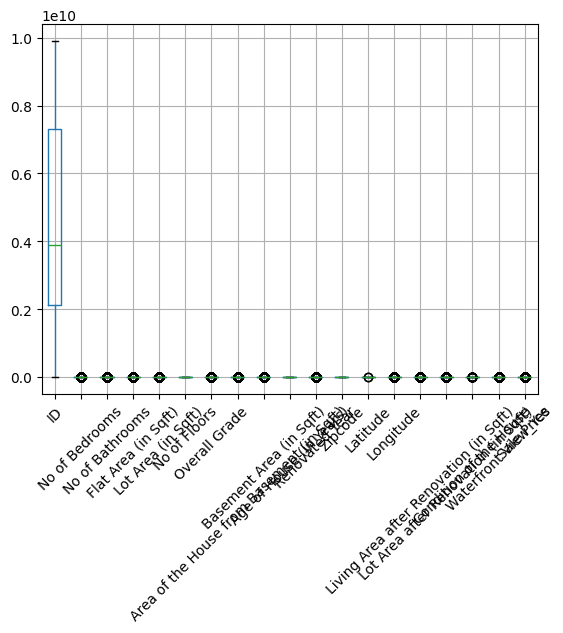

In [43]:
df_comb.boxplot()
plt.xticks(rotation = 45)
plt.show()

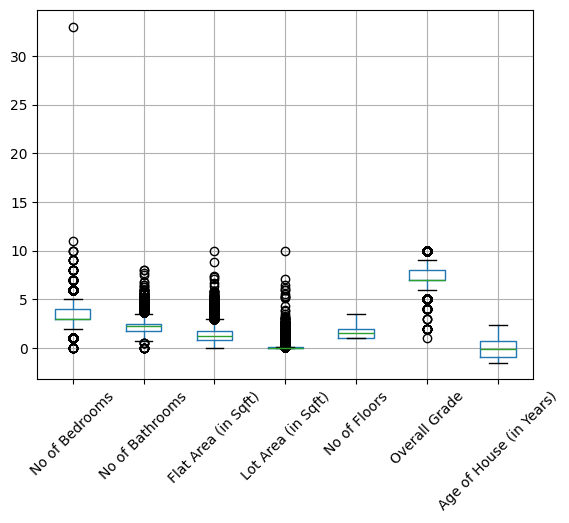

In [44]:
relevant_num_cols = ["No of Bedrooms",
                     "No of Bathrooms",
                     "Flat Area (in Sqft)",
                     "Lot Area (in Sqft)",
                     "No of Floors",
                     "Overall Grade",
                     "Age of House (in Years)"]
# we are not taking 'Area of the House from Basement (in Sqft)' and 'Basement Area (in Sqft)' in this list.
# because, 'Flat Area (in Sqft)' includes both the information.

df_relavant = df_comb[relevant_num_cols]

df_relavant.boxplot()
plt.xticks(rotation = 45)
plt.show()


In [45]:
# finding IQR value for each columns
Q1 = df_relavant.quantile(0.25)
Q3 = df_relavant.quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying rows without outliers
non_outlier = ~((df_relavant < lower_bound) | (df_relavant > upper_bound)).any(axis=1)
df_clean = df_comb.loc[non_outlier]   # using the indeces of the data after removing outliers

# Display the dimensions before and after outlier removal
print("Dimensions before outlier removal:"'\t', df_relavant.shape)
print("Dimensions after outlier removal:"'\t', df_clean.shape)
df_clean.head()

Dimensions before outlier removal:	 (21610, 7)
Dimensions after outlier removal:	 (17336, 20)


,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Date House was Sold,Condition of the House,Waterfront View_Yes,Sale Price
11854,9412700160,3,2.25,1.162264,0.043917,1.0,7,0.889164,0.273100,-0.203881,0,98042.0,47.3925,-122.161,1960.0,7272,14-Aug-17,3.0,0,255000.0
15047,274000020,4,1.75,1.245283,0.042282,1.0,7,1.104065,0.141218,0.170684,0,98030.0,47.3736,-122.215,2000.0,9000,14-Aug-17,3.0,0,274000.0
2468,8563080270,4,2.50,1.532075,0.083109,1.0,9,1.069811,0.462264,-0.101727,0,98008.0,47.6269,-122.090,2810.0,13200,14-Aug-17,3.0,0,824000.0
7983,2473372170,4,3.25,1.909434,0.075955,2.0,8,1.909434,0.000000,-0.169830,0,98058.0,47.4508,-122.132,2360.0,8600,14-Aug-17,3.0,0,432000.0
15058,1823059030,3,1.00,0.777358,0.036430,1.0,7,0.777358,0.000000,0.647402,0,98055.0,47.4806,-122.223,2140.0,7405,14-Aug-17,2.0,0,159000.0


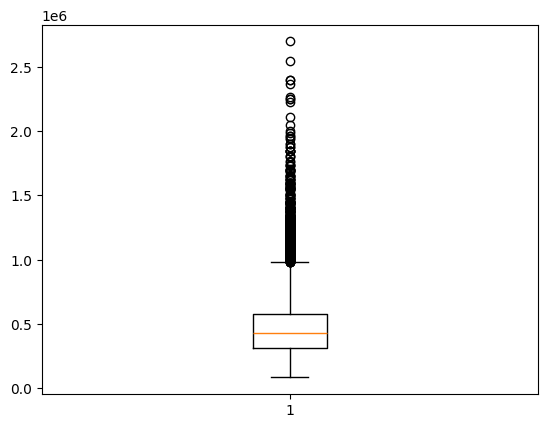

In [46]:
# since this is the target variable, we will not make any change in this. ( encoding, scaling etc)
plt.boxplot(df_clean['Sale Price'])
plt.show()

## **Train-Test Split**
* Set aside the SalePrice column as the **target variable**.
* Split the dataset into **training (80%)** and **testing (20%)** sets using the train_test_split function from sklearn.

In [47]:
df_feat = df_clean.drop('Sale Price', axis=1) # everything except 'Sale Price' are features.
df_targ = df_clean['Sale Price']              # target = 'Sale Price'

X_train, X_test, Y_train, Y_test = train_test_split(df_feat, df_targ, test_size=0.2, random_state=2)

print(" Actual dataset size after cleaning : ", df_clean.shape[0])
print(" Train dataset size : ", X_train.shape[0])
print(" Test dataset size : ", X_test.shape[0])


 Actual dataset size after cleaning :  17336
 Train dataset size :  13868
 Test dataset size :  3468
